1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

We have 2 matrix A(n*k) and B(k*m)
e.g. A = [a11 a12 | a21 a22] and B = [ b11 | b12]
C = A x B = [ c11 | c12]
Here to get resultant matrix each element of every row of matrix A will be multiplied with corresponding element of every column of B.

Hence to get one element of C we need to multiply k elements of A(row elements) with k elements of B(column elements).This need k multiplications.
In one row of C we have m such elements hence for 1 row we need k*m multiplication.
And total we have n rows in C.

Total multiplication = n*k*m

For 1 element in C we have k product terms and hence we need (k-1) addition.
For 1 row we have m such elements so total m*(k-1) addition and we have n such rows.

Total addition = (k-1)*n*m

2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [8]:
import random
import numpy as np
import time

In [40]:
A = [[random.randint(0,9) for i in range(100)] for j in range(200)]
B = [[random.randint(0,9) for i in range(400)] for j in range(100)]
C = [[0 for i in range(400)] for j in range(200)]

n = len(A)
k = len(A[0])
m = len(B[0])

start = time.time()

for i in range(n):
    for j in range(m):
        for l in range(k):
            C[i][j] += A[i][l]*B[l][j];

print('Time taken using list: ', (time.time()-start)*1000 ,'ms')

Time taken using list:  4372.142553329468 ms


In [42]:
A1 = np.array(A)
B1 = np.array(B)
start = time.time()

C1 = np.dot(A1,B1)

print('Time taken using numpy: ', (time.time()-start)*1000 ,'ms')

Time taken using numpy:  11.84701919555664 ms


In [48]:
A2 = np.array(A)
B2 = np.array(B)
C2 = np.zeros((n,m))
start = time.time()

for i in range(n):
    for j in range(m):
        for l in range(k):
            C2[i][j] += A2[i][l]*B2[l][j]

print('Time taken using numpy: ', (time.time()-start)*1000 ,'ms')

Time taken using numpy:  16945.387840270996 ms


Here for same dimension with list we got much more time compare to numpy array with it's function dot.
At the same time if we manually use loop then we got very much time compare to dot function.

In python everything is treated as object and hence list will be stored as list of pointers which points to object which might not be contigous while in numpy array is stored as contigous memory and of fixed data-type.
dot method had optimal way for this multiplication and hence we get result significantly faster than loop approach.

3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [94]:
arr = [random.randint(0,30) for i in range(600)]
print(arr)

def find_highest_element(arr):
    curr = arr[0]
    for num in arr:
        if num > curr:
            curr=num
    return curr

n=len(arr)
median = len(arr)//2
n1=0
n2=0
start = time.time()
temp=arr.copy()
for i in range(median+1):
    n1=n2
    n2=find_highest_element(temp)
    temp.remove(n2)

if (n%2==0):
    median = (n1+n2)/2

else:
    median = n2
print("Time taken to find median is: ",(time.time()-start)*1000 ,'ms')
print("Median of array: " , median)

[3, 1, 17, 19, 15, 3, 22, 9, 9, 4, 19, 10, 30, 20, 21, 8, 19, 19, 18, 27, 18, 12, 18, 4, 2, 13, 16, 7, 0, 19, 27, 15, 3, 24, 13, 22, 19, 22, 9, 21, 15, 21, 5, 29, 29, 23, 5, 12, 20, 2, 13, 12, 20, 27, 12, 2, 28, 30, 16, 12, 17, 3, 10, 7, 16, 24, 12, 1, 24, 4, 20, 17, 24, 9, 11, 8, 25, 25, 29, 20, 11, 3, 13, 1, 4, 5, 28, 23, 21, 13, 24, 29, 8, 19, 20, 6, 8, 10, 16, 2, 23, 11, 12, 21, 25, 27, 3, 4, 21, 3, 7, 19, 10, 0, 4, 9, 30, 24, 22, 0, 9, 10, 8, 18, 1, 7, 12, 11, 20, 3, 6, 21, 28, 28, 25, 21, 24, 4, 18, 17, 2, 6, 11, 16, 15, 4, 15, 3, 12, 18, 22, 30, 1, 0, 6, 2, 18, 20, 6, 13, 23, 5, 3, 8, 30, 13, 13, 5, 5, 27, 0, 26, 27, 28, 0, 19, 3, 20, 10, 29, 12, 11, 25, 23, 17, 3, 23, 11, 9, 3, 9, 7, 24, 4, 30, 15, 16, 21, 17, 1, 26, 17, 13, 22, 2, 13, 13, 6, 22, 19, 7, 21, 12, 20, 23, 27, 22, 20, 3, 7, 27, 7, 29, 13, 2, 15, 8, 27, 28, 10, 7, 22, 9, 8, 28, 22, 10, 11, 28, 24, 27, 6, 28, 9, 4, 5, 1, 18, 26, 2, 8, 9, 30, 1, 19, 4, 15, 14, 6, 25, 18, 24, 8, 18, 6, 19, 22, 0, 18, 15, 26, 6, 6, 25, 

In [96]:
#Optimal way to find median
def partition(arr,left,right,index):
    pivot = arr[index]
    arr[index], arr[right] = arr[right], arr[index]  
    start = left
    for i in range(left, right):
        if arr[i] < pivot:
            arr[i], arr[start] = arr[start], arr[i]
            start += 1
    arr[start], arr[right] = arr[right], arr[start]  
    return start

def quickselect(arr, left, right, n):
    # If list has only single element
    if left == right:  
        return arr[left]
    
    index = left + random.randint(0, right - left)  
    index = partition(arr, left, right, index)

    #If pivot index is our desired index of an array
    if n == index:
        return arr[n]
    elif n < index: #we have to search in left part
        return quickselect(arr, left, index - 1, n)
    else: #we have to search in right part
        return quickselect(arr, index + 1, right, n)
        
def find_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, 0, n - 1, n // 2)
    else:
        return (quickselect(arr, 0, n - 1, (n // 2) - 1) + quickselect(arr, 0, n - 1, n // 2)) / 2

start = time.time()
median = find_median(arr)

print("Time taken to find median is: ",(time.time()-start)*1000 ,'ms')
print("Median of array: " , median)

Time taken to find median is:  1.0786056518554688 ms
Median of array:  15.0


In [98]:
start = time.time()
median = np.median(arr)

print("Time taken to find median is: ",(time.time()-start)*1000 ,'ms')
print("Median of array: " , median)

Time taken to find median is:  0.0 ms
Median of array:  15.0


Here the approach mentioned in question will take O(n^2).
The optimal approach is quickselect whose average time complexity is O(n) and worst case O(n^2).

With array of size 600 given approach is taking 10.24 ms, quicksort is taking 1.078 ms and np.median is taking 0 ms.



4) What is the gradient of the following function with respect to x and y? x^2*y + y^3*sinx

The gradient of a function is a vector of the partial derivatives of the function and it indicates the direction in which function is increasing rapidly and show the direction of steepest slope which is used to find the maximum and minimum value of the function.

Gradient of the given function:
df/dx = 2xy + y^3 cosx

df/dy = x^2 + 3y^2 sinx

gradient = <2xy + y^3 cosx,x^2 + 3y^2 sinx>



5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

JAX: Developed mostly for machine learning research. It's most important features includes automatic differentiation, Just in time compilation and numpy compatible.

In [102]:
!pip install jax jaxlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.0 MB 2.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.0 MB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 1.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/2.0 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.0 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.0 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.0 MB 1.9 MB/s eta 0:00:01
   ---------------- ---------

In [39]:
import jax.numpy as jnp
from jax import grad

In [41]:
#analytical solution
def fun(x, y):
    return x**2 * y + y**3 * jnp.sin(x) #Here we have to use jnp.sin as math.sin doesn't work with JAX automatic differentiation.

def a_grad(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return [df_dx, df_dy]

x1 = float(random.randint(0, 10))
y1 = float(random.randint(0, 15))

analytical_grad = a_grad(x1, y1)
#grad(fun,0) will give gradient of fun with respect to x and y
jax_grad_x = grad(fun,0)(x1,y1)
jax_grad_y = grad(fun,1)(x1,y1)

print('Analytical ans: ',analytical_grad)
print('JAX ans: ',jax_grad_x,jax_grad_y)

Analytical ans:  [Array(-111.663574, dtype=float32, weak_type=True), Array(565.6046, dtype=float32, weak_type=True)]
JAX ans:  -111.663574 565.6046


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

As shown in question we will need a dictionary in hierarchical form where 1st level indicates year, 2nd level indicates branches and 3rd level indicates students. Students level contains student's roll no and subject name with marks obtain in it.

In [71]:
import json
student_records = {
    2022:{
        'Branch 1':{
            1 : {
                'Name' : 'Stu1',
                'marks' : {
                    'sub1' : 95
                }
            },
            2 : {
                'Name' : 'Stu2',
                'marks' : {
                    'sub1' : 91,
                    'sub2' : 90
                }
            }
        },
        'Branch 2':{
            1 : {
                'Name' : 'Stu3',
                'marks' : {
                    'sub1' : 95
                }
            },
            2 : {
                'Name' : 'Stu4',
                'marks' : {
                    'sub1' : 91,
                    'sub2' : 90
                }
            }
        }
    },
    2023:{
        'Branch 1':{
            1 : {
                'Name' : 'Stu1',
                'marks' : {
                    'sub1' : 95,
                    'sub2' : 92
                }
            },
            2 : {
                'Name' : 'Stu5',
                'marks' : {
                    'sub1' : 91,
                    'sub2' : 90,
                    'sub3' : 93
                }
            }
        },
        'Branch 2':{
            1 : {
                'Name' : 'Stu1',
                'marks' : {
                    'sub1' : 95,
                    'sub2' : 92
                }
            }
        },
        'Branch 3':{
            1 : {
                'Name' : 'Stu1',
                'marks' : {
                    'sub1' : 95
                }
            }
        },
    },
    2024:{
        'Branch 1':{
            1 : {
                'Name' : 'Stu1',
                'marks' : {
                    'sub1' : 95,
                    'sub2' : 92
                }
            },
             2 : {
                'Name' : 'Stu5',
                'marks' : {
                    'sub1' : 91,
                    'sub2' : 90,
                    'sub3' : 93,
                    'sub4' : 97
                }
            }
        }
    }
}

print(json.dumps(student_records,indent=3))

{
   "2022": {
      "Branch 1": {
         "1": {
            "Name": "Stu1",
            "marks": {
               "sub1": 95
            }
         },
         "2": {
            "Name": "Stu2",
            "marks": {
               "sub1": 91,
               "sub2": 90
            }
         }
      },
      "Branch 2": {
         "1": {
            "Name": "Stu3",
            "marks": {
               "sub1": 95
            }
         },
         "2": {
            "Name": "Stu4",
            "marks": {
               "sub1": 91,
               "sub2": 90
            }
         }
      }
   },
   "2023": {
      "Branch 1": {
         "1": {
            "Name": "Stu1",
            "marks": {
               "sub1": 95,
               "sub2": 92
            }
         },
         "2": {
            "Name": "Stu5",
            "marks": {
               "sub1": 91,
               "sub2": 90,
               "sub3": 93
            }
         }
      },
      "Branch 2": {
         "1": 

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [73]:
class Subject:
    def __init__(self,name,marks):
        self.name = name
        self.marks = marks

    def __str__(self):
        return f"      {self.name}:{self.marks}"

class Student:
    def __init__(self,roll_no,name):
        self.roll_no = roll_no
        self.name = name
        self.subjects = []

    def add_subject(self,subject):
        self.subjects.append(subject)

    def __str__(self):
        subjects = '      Subjects:\n'
        for subject in self.subjects:
            subjects += f" {str(subject)}\n"
        return f"   Roll No.: {self.roll_no}, Name: {self.name} \n {subjects}"

class Branch:
    def __init__(self,name):
        self.name = name
        self.students = []
        
    def add_student(self,student):
        self.students.append(student)

    def __str__(self):
        students = "   Students: \n"
        for student in self.students:
            students += f" {str(student)}\n"
        return f"{self.name} : \n {students}"
        
class Year:
    def __init__(self,year):
        self.year = year
        self.branches = []
        
    def add_branch(self,branch):
        self.branches.append(branch)
    def __str__(self):
        branches = "Branches:\n"
        for branch in self.branches:
            branches += f" {str(branch)}\n"
        return f"Year:{self.year} \n {branches}"


In [75]:
#Creating database using classes:

student1 = Student(1,'Stu1')
student1.add_subject(Subject('sub1',95))

student2 = Student(2,'Stu2')
student2.add_subject(Subject('sub1',91))
student2.add_subject(Subject('sub2',90))

student3 = Student(1,'Stu3')
student3.add_subject(Subject('sub1',95))

student4 = Student(2,'Stu4')
student4.add_subject(Subject('sub1',91))
student4.add_subject(Subject('sub2',90))

student5 = Student(1,'Stu1')
student5.add_subject(Subject('sub1',95))
student5.add_subject(Subject('sub2',92))

student6 = Student(2,'Stu5')
student6.add_subject(Subject('sub1',91))
student6.add_subject(Subject('sub2',90))
student6.add_subject(Subject('sub3',93))

student7 = Student(1,'Stu1')
student7.add_subject(Subject('sub1',95))
student7.add_subject(Subject('sub2',92))

student8 = Student(1,'Stu1')
student8.add_subject(Subject('sub1',95))

student9 = Student(1,'Stu1')
student9.add_subject(Subject('sub1',95))
student9.add_subject(Subject('sub2',92))

student10 = Student(2,'Stu5')
student10.add_subject(Subject('sub1',91))
student10.add_subject(Subject('sub2',90))
student10.add_subject(Subject('sub3',93))
student10.add_subject(Subject('sub4',97))

branch1 = Branch('Branch1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch2')
branch2.add_student(student3)
branch2.add_student(student4)

branch3 = Branch('Branch1')
branch3.add_student(student5)
branch3.add_student(student6)

branch4 = Branch('Branch2')
branch4.add_student(student7)

branch5 = Branch('Branch3')
branch5.add_student(student8)

branch6 = Branch('Branch1')
branch6.add_student(student9)
branch6.add_student(student10)

year1 = Year(2022)
year1.add_branch(branch1)
year1.add_branch(branch2)

year2 = Year(2023)
year2.add_branch(branch3)
year2.add_branch(branch4)
year2.add_branch(branch5)

year3 = Year(2024)
year3.add_branch(branch6)

print(year1)
print(year2)
print(year3)

Year:2022 
 Branches:
 Branch1 : 
    Students: 
    Roll No.: 1, Name: Stu1 
       Subjects:
       sub1:95

    Roll No.: 2, Name: Stu2 
       Subjects:
       sub1:91
       sub2:90


 Branch2 : 
    Students: 
    Roll No.: 1, Name: Stu3 
       Subjects:
       sub1:95

    Roll No.: 2, Name: Stu4 
       Subjects:
       sub1:91
       sub2:90



Year:2023 
 Branches:
 Branch1 : 
    Students: 
    Roll No.: 1, Name: Stu1 
       Subjects:
       sub1:95
       sub2:92

    Roll No.: 2, Name: Stu5 
       Subjects:
       sub1:91
       sub2:90
       sub3:93


 Branch2 : 
    Students: 
    Roll No.: 1, Name: Stu1 
       Subjects:
       sub1:95
       sub2:92


 Branch3 : 
    Students: 
    Roll No.: 1, Name: Stu1 
       Subjects:
       sub1:95



Year:2024 
 Branches:
 Branch1 : 
    Students: 
    Roll No.: 1, Name: Stu1 
       Subjects:
       sub1:95
       sub2:92

    Roll No.: 2, Name: Stu5 
       Subjects:
       sub1:91
       sub2:90
       sub3:93
       sub4

9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

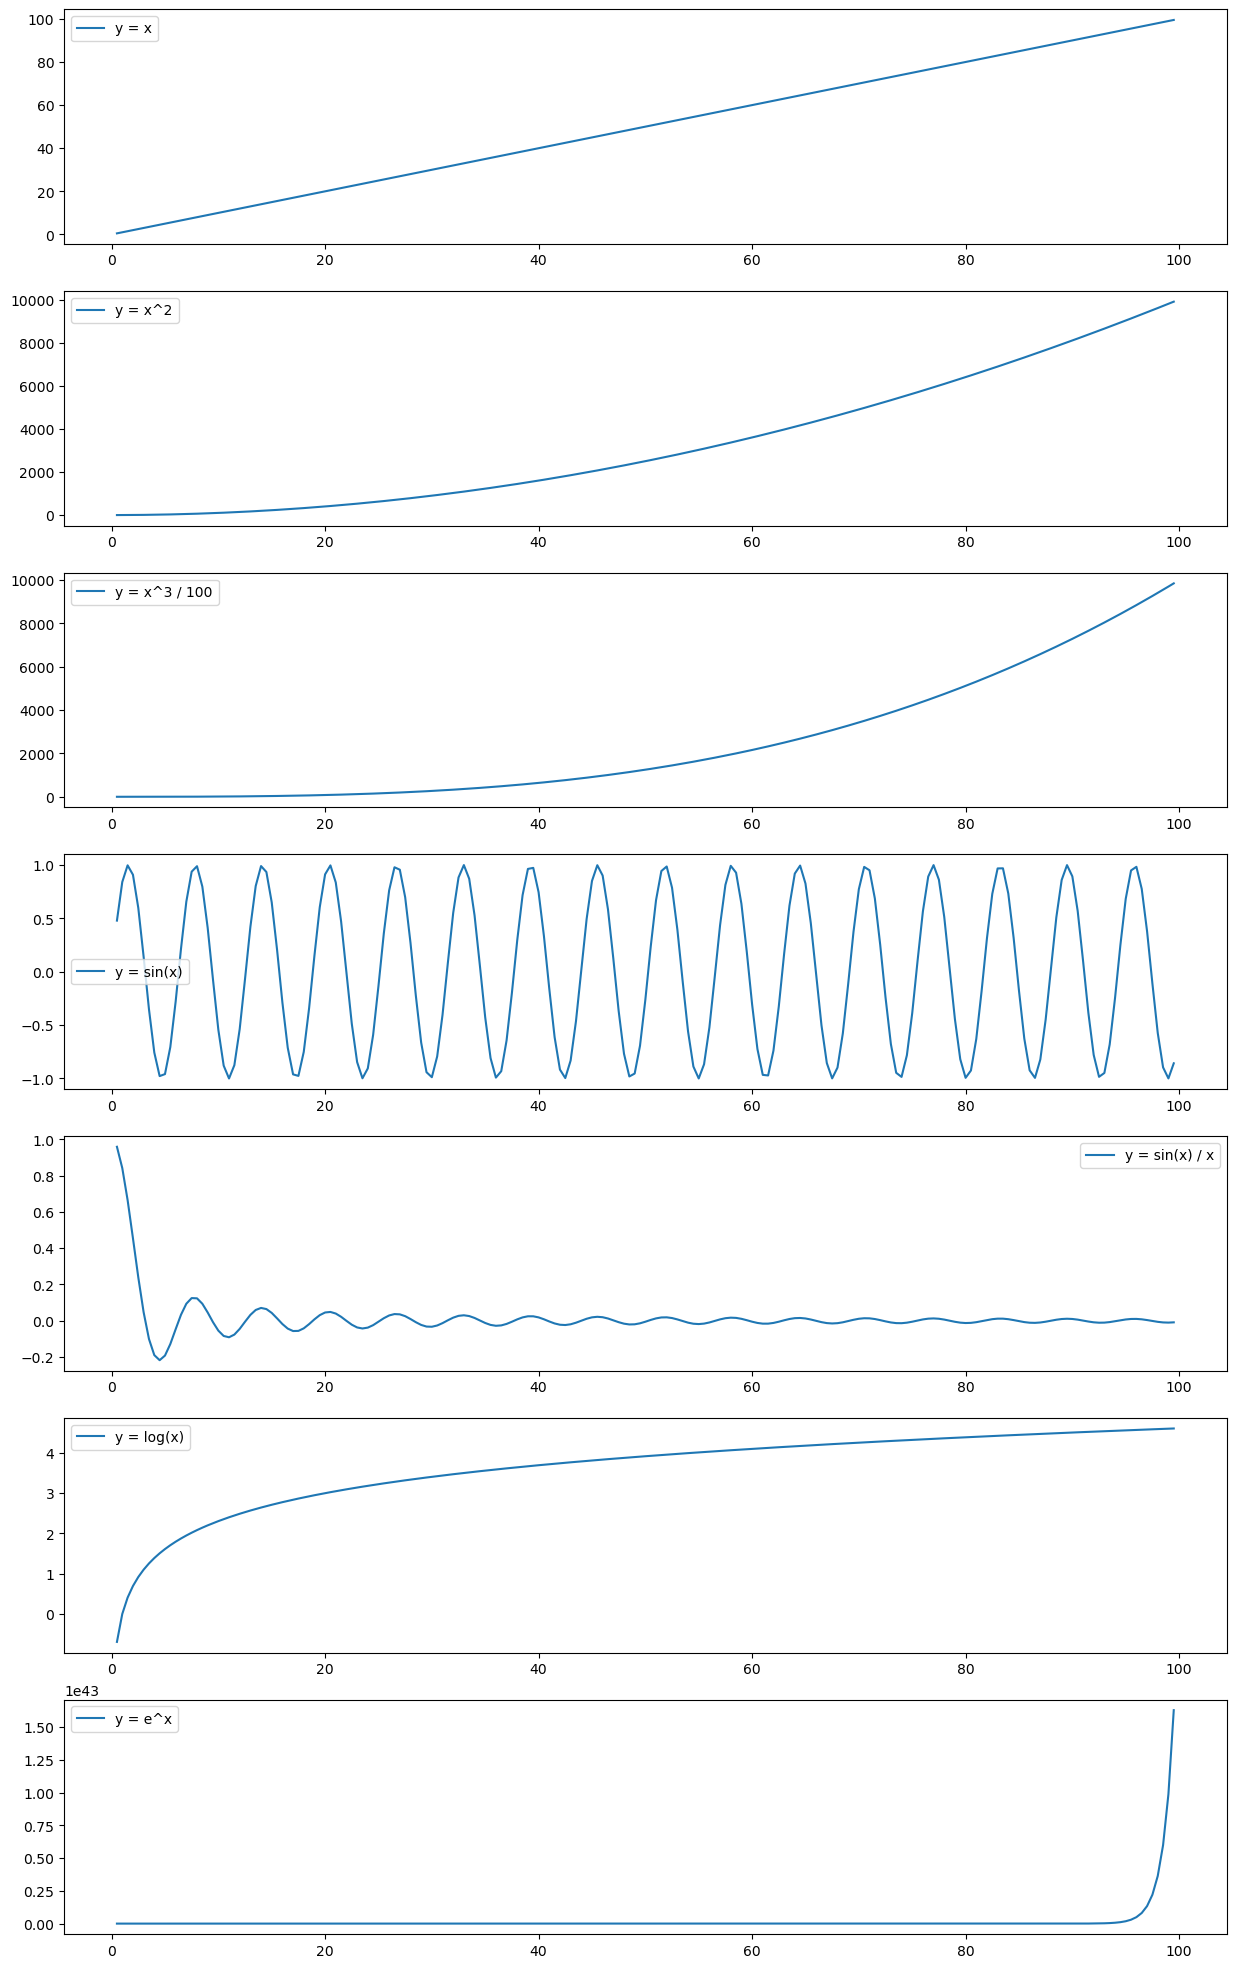

In [91]:
import matplotlib.pyplot as plt

x = np.arange(0.5,100,0.5)

y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(15, 25))

plt.subplot(7,1,1)
plt.plot(x,y1,label='y = x')
plt.legend() #To get label

plt.subplot(7,1,2)
plt.plot(x,y2,label='y = x^2')
plt.legend()

plt.subplot(7,1,3)
plt.plot(x,y3,label='y = x^3 / 100')
plt.legend()

plt.subplot(7,1,4)
plt.plot(x,y4,label='y = sin(x)')
plt.legend()

plt.subplot(7,1,5)
plt.plot(x,y5,label='y = sin(x) / x')
plt.legend()

plt.subplot(7,1,6)
plt.plot(x,y6,label='y = log(x)')
plt.legend()

plt.subplot(7,1,7)
plt.plot(x,y7,label='y = e^x')
plt.legend()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
